# Data Project 



Analysing data from the Global Abortion Incidence Dataset (https://osf.io/5k7fp/)

Imports: 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
%matplotlib inline

Set the size of plots in inches:

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Load CSV file: 

In [51]:
if os.path.isfile("global_abortion_incidence_dataset.csv"):
    filepath = "global_abortion_incidence_dataset.csv"
    print("loading from file")
else:
    filepath = "https://osf.io/6t4eh"
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from file
done


Finding out the kind of data columns in the dataset:

In [52]:
df.columns

Index(['country', 'iso', 'yearstart', 'yearend', 'region', 'subregion',
       'numberofabortions', 'abortionrate', 'perc_p_ending_in_a',
       'spontaneous', 'datatype', 'datasource', 'complete', 'classification',
       'modelused', 'marriedonly', 'notes'],
      dtype='object')

Row 1 data for reference provides: 

In [53]:
row_one = df.iloc[1]
row_one

country                                   Albania
iso                                           8.0
yearstart                                    1991
yearend                                      1991
region                Europe and Northern America
subregion                         Southern Europe
numberofabortions                         20300.0
abortionrate                                  NaN
perc_p_ending_in_a                            NaN
spontaneous                                    No
datatype                      Official Statistics
datasource                           Henshaw 2001
complete                               Incomplete
classification              Below survey of women
modelused                                     Yes
marriedonly                                   NaN
notes                                         NaN
Name: 1, dtype: object

## Analysis of participating subregions: 

Text(0, 0.5, 'Count of entries')

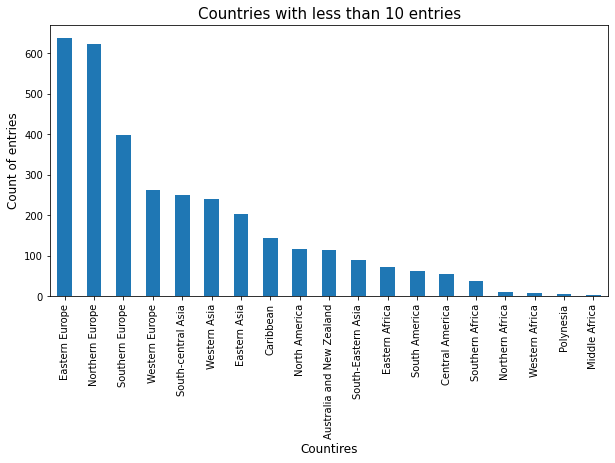

In [54]:
sub_v = df["subregion"].value_counts()
sub_v.plot(kind="bar")
plt.title("Countries with less than 10 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)
#may be misleading, as entries are not consistent

## Analysis of participating countries: 


### number of participating countries and entires:

In [55]:
df["country"].value_counts()

Lithuania                           80
Croatia                             77
Russian Federation                  75
Slovakia                            73
United States of America            72
                                    ..
Kenya                                1
South Korea                          1
Democratic Republic of the Congo     1
Rwanda                               1
Congo                                1
Name: country, Length: 108, dtype: int64

<AxesSubplot:>

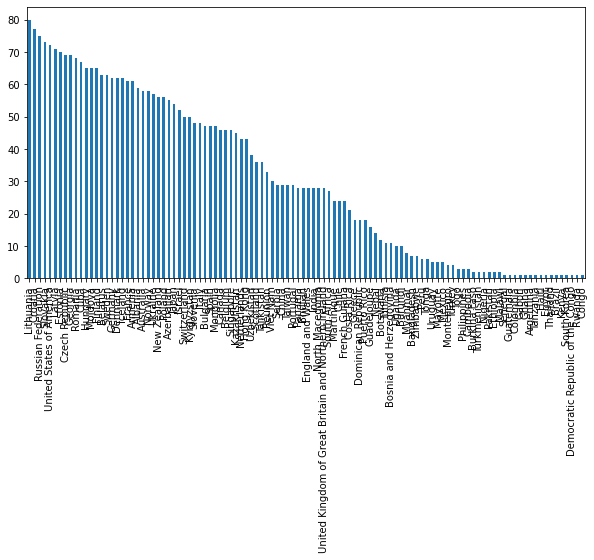

In [56]:
count_v = df["country"].value_counts()
count_v[count_v<100].plot(kind="bar")

Countires with less than 10 entries in dataset:

Text(0, 0.5, 'Count of entries')

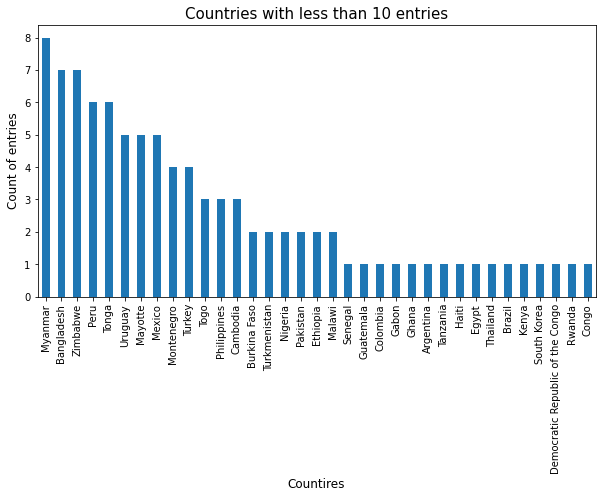

In [57]:
count_v[count_v<10].plot(kind="bar")
plt.title("Countries with less than 10 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

Countries with more than 50 entries in dataset

Text(0, 0.5, 'Count of entries')

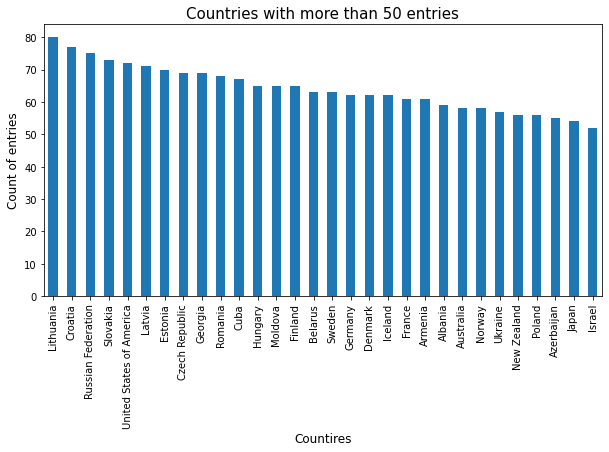

In [58]:
count_v[count_v>50].plot(kind="bar")
plt.title("Countries with more than 50 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

In [122]:
country_data = []
for name, c_df in df.groupby("country"):
    country_data.append(
        {
            "country": name,
            "first_year": c_df.yearstart.min(),
            "last_year": c_df.yearstart.max(),
        }
    )
country_range = pd.DataFrame(country_data)


,country,first_year,last_year
0,Albania,1990,2017
1,Argentina,2000,2000
2,Armenia,1990,2016
3,Australia,1990,2016
4,Azerbaijan,1990,2017
...,...,...,...
103,United States of America,1990,2017
104,Uruguay,2013,2017
105,Uzbekistan,1990,2017
106,Viet Nam,1990,2016


In [124]:
country_range.plot(kind="bar")

NameError: name 'country_range' is not defined

## Analysing data type:

Text(0, 0.5, 'Count of entries')

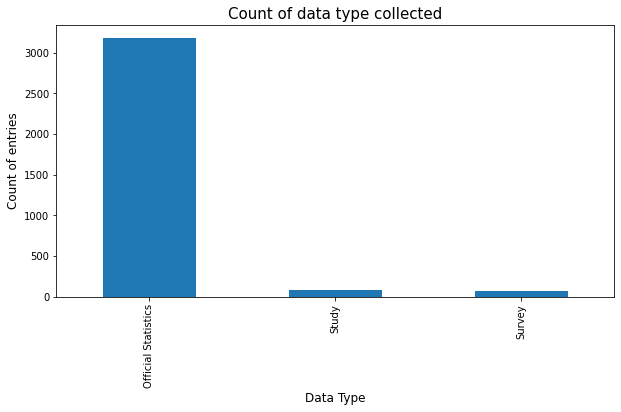

In [60]:
datatype = df["datatype"].value_counts()
datatype.plot(kind="bar")
plt.title("Count of data type collected", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

In [82]:
nabort_datatype = df.groupby(["datatype"])["numberofabortions"].sum()
nabort_datatype

datatype
Official Statistics    601451790.0
Study                   75165453.0
Survey                   1089580.0
Name: numberofabortions, dtype: float64

## Analysing percentage of pregnancies that end in abortion:

NEED TO ADD NO. OF ABORTION INCIDENCES AGAINST THIS 

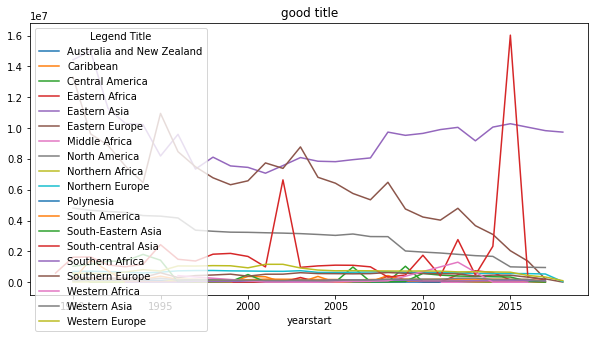

In [106]:
legend_labels = []
for region_name, sub_df in df.groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("good title")
plt.legend(legend_labels, title='Legend Title')


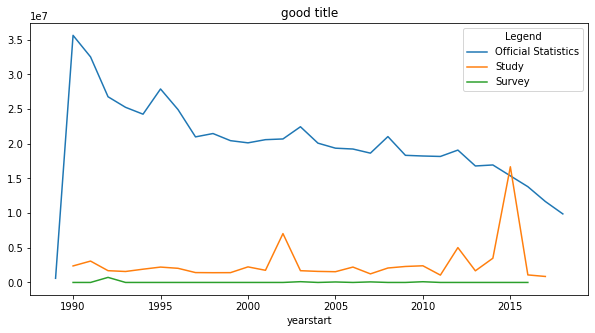

In [113]:
legend_labels = []
for datatype_name, sub_df in df.groupby("datatype"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(datatype_name)
plt.title("good title")
plt.legend(legend_labels, title='Legend')


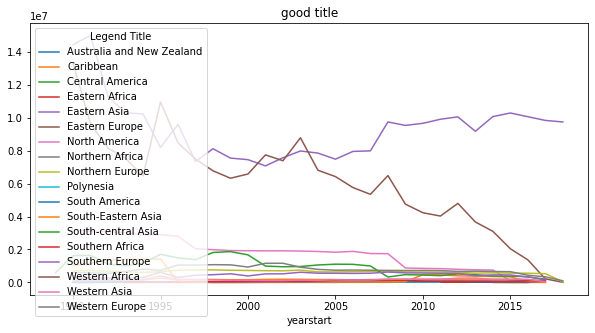

In [116]:
legend_labels = []
for region_name, sub_df in df[df.datatype=="Official Statistics"].groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("good title")
plt.legend(legend_labels, title='Legend Title')

Text(0, 0.5, 'Count of entries')

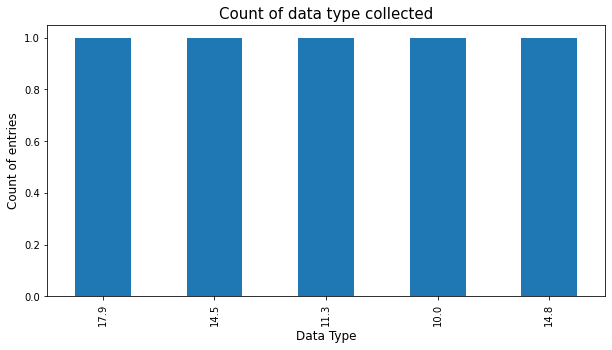

In [61]:
perc = df["perc_p_ending_in_a"].value_counts()
perc.plot(kind="bar")
plt.title("Count of data type collected", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

In [83]:
nabort_percend = df.groupby(["perc_p_ending_in_a"])["numberofabortions"].sum()
nabort_percend

perc_p_ending_in_a
10.0         0.0
11.3         0.0
14.5         0.0
14.8    161975.0
17.9         0.0
Name: numberofabortions, dtype: float64

## Analysing abortion rate:

Text(0, 0.5, 'bin of 10')

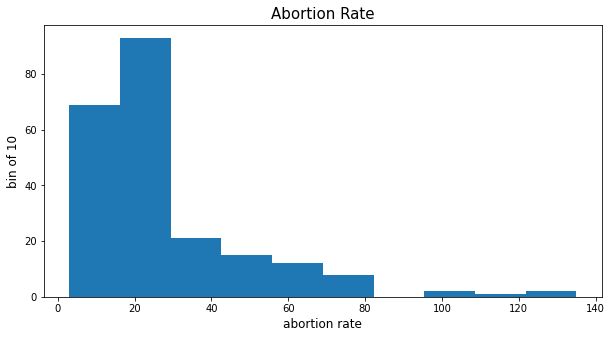

In [62]:
#observed rate of abortions per 1000 women of reproductive age within the country and year
num_of_bins = 10

abortr = df["abortionrate"]
plt.hist(abortr, bins=num_of_bins)
plt.title("Abortion Rate", fontsize=15)
plt.xlabel('abortion rate', fontsize=12)
plt.ylabel('bin of 10', fontsize=12)

## Analysing abortion incidences: 

Text(0, 0.5, 'bin of 10')

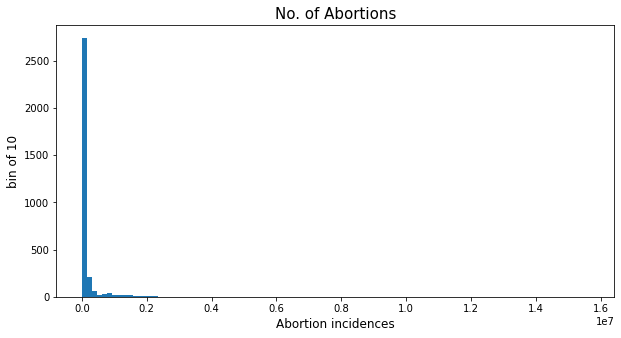

In [63]:
plt.hist(df["numberofabortions"], bins=100)
plt.title("No. of Abortions", fontsize=15)
plt.xlabel('Abortion incidences', fontsize=12)
plt.ylabel('bin of 10', fontsize=12)

In [66]:
nabort_year = df.groupby(["yearstart"])["numberofabortions"].sum()
nabort_year

yearstart
1989      596357.0
1990    38021370.0
1991    35612928.0
1992    29208656.0
1993    26841293.0
1994    26181417.0
1995    30122356.0
1996    26974352.0
1997    22418455.0
1998    22883516.0
1999    21863690.0
2000    22380808.0
2001    22347499.0
2002    27742049.0
2003    24261405.0
2004    21684873.0
2005    20983488.0
2006    21463361.0
2007    19965842.0
2008    23120567.0
2009    20640605.0
2010    20743153.0
2011    19231979.0
2012    24117558.0
2013    18478359.0
2014    20439201.0
2015    32059616.0
2016    14899792.0
2017    12538232.0
2018     9884046.0
Name: numberofabortions, dtype: float64

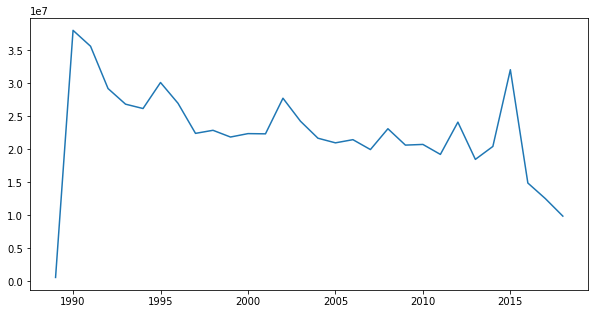

In [68]:
plt.plot(nabort_year)

In [85]:
nabort_region = df.groupby(["subregion"])["numberofabortions"].sum()
nabort_region

<bound method Series.sort_values of subregion
Australia and New Zealand      2329002.0
Caribbean                      5456628.0
Central America                2983385.0
Eastern Africa                 3051744.0
Eastern Asia                 271958194.0
Eastern Europe               175375197.0
Middle Africa                   146713.0
North America                 83326615.0
Northern Africa                 358338.0
Northern Europe               18543478.0
Polynesia                          318.0
South America                  3785537.0
South-Eastern Asia            11695235.0
South-central Asia            55772991.0
Southern Africa                1909213.0
Southern Europe               12770103.0
Western Africa                 1829913.0
Western Asia                   4546909.0
Western Europe                21867310.0
Name: numberofabortions, dtype: float64>

WANT TO SORT VALUES BE DESCENDING

WANT TO DIG DEEPER INTO EASTERN ASIA DATA, THE HIGHEST SUM OF ABORTIONS

In [88]:
nabort_region_type = df.groupby(["subregion", "datatype"])["numberofabortions"].sum()
nabort_region_type

subregion                  datatype           
Australia and New Zealand  Official Statistics      1123741.0
                           Study                    1205261.0
Caribbean                  Official Statistics      5360339.0
                           Study                      96289.0
                           Survey                         0.0
Central America            Official Statistics       356149.0
                           Study                    2627236.0
Eastern Africa             Official Statistics       235179.0
                           Study                    2816565.0
                           Survey                         0.0
Eastern Asia               Official Statistics    271427179.0
                           Study                     342433.0
                           Survey                    188582.0
Eastern Europe             Official Statistics    174645584.0
                           Survey                    729613.0
Middle Africa          

CAN I VISUALISE THIS?

In [91]:
df.sort_values("numberofabortions", ascending=False).head(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1508,India,356.0,2015,2015,Central and Southern Asia,South-central Asia,15644748.0,47.0,NaN,No,Study,Singh et al 2018,NaN,NaN,Yes,All women,NaN
541,China,156.0,1991,1991,East and Southeastern Asia,Eastern Asia,14086313.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Complete,NaN,Yes,NaN,NaN
540,China,156.0,1990,1990,East and Southeastern Asia,Eastern Asia,13493926.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Complete,NaN,Yes,NaN,NaN
542,China,156.0,1992,1992,East and Southeastern Asia,Eastern Asia,10416287.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
565,China,156.0,2015,2015,East and Southeastern Asia,Eastern Asia,9851961.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
568,China,156.0,2018,2018,East and Southeastern Asia,Eastern Asia,9740000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
566,China,156.0,2016,2016,East and Southeastern Asia,Eastern Asia,9645000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
567,China,156.0,2017,2017,East and Southeastern Asia,Eastern Asia,9627000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
564,China,156.0,2014,2014,East and Southeastern Asia,Eastern Asia,9621995.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
543,China,156.0,1993,1993,East and Southeastern Asia,Eastern Asia,9496119.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN


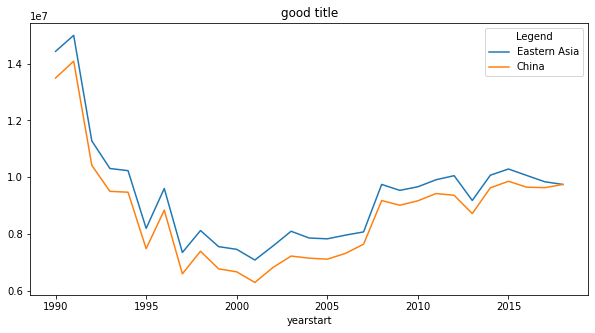

In [118]:
df[df.subregion == "Eastern Asia"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

df[df.country == "China"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

plt.title("good title")
plt.legend(["Eastern Asia", "China"], title='Legend')


In [93]:
df.sort_values("abortionrate", ascending=False).head(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1156,Georgia,268.0,1996,1999,Western Asia and Northern Africa,Western Asia,NaN,135.0,NaN,No,Survey,1999 Georgia RHS,NaN,NaN,Yes,All women,NaN
2409,Romania,642.0,1992,1992,Europe and Northern America,Eastern Europe,729613.0,129.5,NaN,No,Survey,1993 Romania RHS,NaN,NaN,Yes,All women,NaN
77,Azerbaijan,31.0,1998,2001,Western Asia and Northern Africa,Western Asia,NaN,116.0,NaN,No,Survey,2001 Azerbaijan RHS,NaN,NaN,Yes,All women,NaN
1172,Georgia,268.0,2002,2005,Western Asia and Northern Africa,Western Asia,NaN,104.0,NaN,No,Survey,2005 Georgia RHS,NaN,NaN,Yes,All women,NaN
2488,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,99.3,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Perm City only
199,Armenia,51.0,2000,2000,Western Asia and Northern Africa,Western Asia,NaN,81.0,NaN,No,Survey,2000 Armenia DHS,NaN,NaN,Yes,All women,NaN
2490,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,79.4,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Yekaterinburg City only
2491,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,77.1,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Ivanovo Oblast only
2425,Romania,642.0,1996,1999,Europe and Northern America,Eastern Europe,NaN,74.0,NaN,No,Survey,1999 Romania RHS,NaN,NaN,Yes,All women,NaN
705,Cuba,192.0,1990,1990,Latin America,Caribbean,NaN,72.9,NaN,No,Official Statistics,Gran Álvarez and López Nistal 2003,Complete,NaN,Yes,NaN,"Rate is per 1,000 women ages 12-49"


In [92]:
df.sort_values("numberofabortions", ascending=False).tail(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
3037,Uganda,800.0,2006,2007,Sub-Saharan Africa,Eastern Africa,NaN,8.0,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3038,Uganda,800.0,2007,2008,Sub-Saharan Africa,Eastern Africa,NaN,11.4,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3039,Uganda,800.0,2008,2009,Sub-Saharan Africa,Eastern Africa,NaN,10.3,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3040,Uganda,800.0,2009,2010,Sub-Saharan Africa,Eastern Africa,NaN,8.7,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3041,Uganda,800.0,2010,2011,Sub-Saharan Africa,Eastern Africa,NaN,10.1,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3043,Uganda,800.0,2012,2013,Sub-Saharan Africa,Eastern Africa,NaN,12.5,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3057,Ukraine,804.0,1999,1999,Europe and Northern America,Eastern Europe,NaN,54.0,NaN,No,Survey,1999 Ukraine RHS,NaN,NaN,Yes,All women,NaN
3076,Ukraine,804.0,2004,2007,Europe and Northern America,Eastern Europe,NaN,15.0,NaN,No,Survey,2007 Ukraine DHS,NaN,NaN,Yes,All women,NaN
3245,Uzbekistan,860.0,1993,1996,Central and Southern Asia,South-central Asia,NaN,20.0,NaN,No,Survey,1996 Uzbekistan DHS,NaN,NaN,Yes,All women,NaN
3251,Uzbekistan,860.0,2000,2002,Central and Southern Asia,South-central Asia,NaN,27.0,NaN,No,Survey,2002 Uzbekistan HES,NaN,NaN,Yes,All women,NaN
